In [1]:
import numpy as np
import matplotlib.pyplot as plt
import opt_einsum

import sys
sys.path.insert(0,'../fem')
from GRF import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
d = 2
l = 0.2
c = 1
b = 0
grf = ScaledGRF(d,l,c,b)
# grf = ScaledSquaredGRF(d,l,c,b)

In [4]:
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T

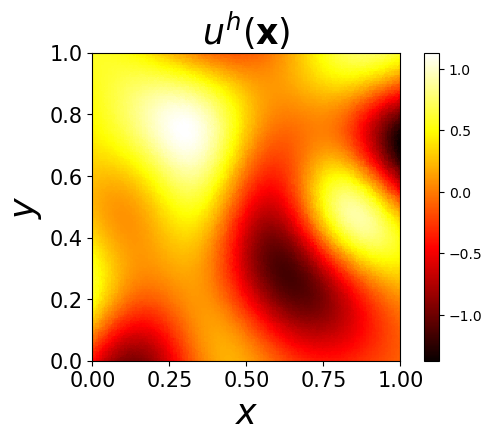

In [5]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], grf.forward(x), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

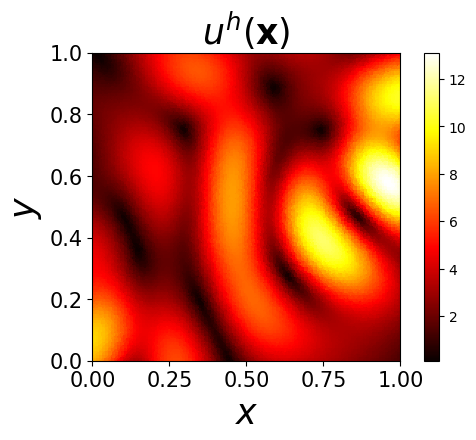

In [6]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], np.sqrt(np.sum(grf.grad(x)**2, axis=-1)), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

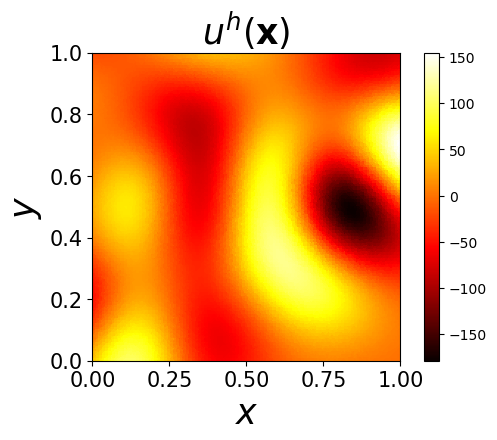

In [7]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], grf.laplacian(x), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

In [8]:
theta = ScaledSquaredGRF(d=2,l=0.2,c=0.2,b=0.1)
u = ScaledGRF(d=2,l=0.2,c=0.01,b=0)

In [9]:
class Forcing:
    def __init__(self, theta, u):
        super().__init__()
        self.theta = theta
        self.u = u

    def forward(self, x):
        return -theta.forward(x)*u.laplacian(x) - np.sum(theta.grad(x)*u.grad(x), axis=-1)

In [10]:
class NeumannBC:
    def __init__(self, n, theta, u):
        super().__init__()
        self.n = n
        self.theta = theta
        self.u = u

    def forward(self, x):
        return opt_einsum.contract('i,N,Ni->N', self.n, self.theta.forward(x), self.u.grad(x))

In [11]:
class DirichletBC:
    def __init__(self, theta, u):
        super().__init__()
        self.theta = theta
        self.u = u

    def forward(self, x):
        return theta.forward(x)*u.forward(x)

In [12]:
etat = NeumannBC(np.array([0,1]),theta, u)
etab = NeumannBC(np.array([0,-1]),theta, u)
g = DirichletBC(theta, u)
f = Forcing(theta, u)

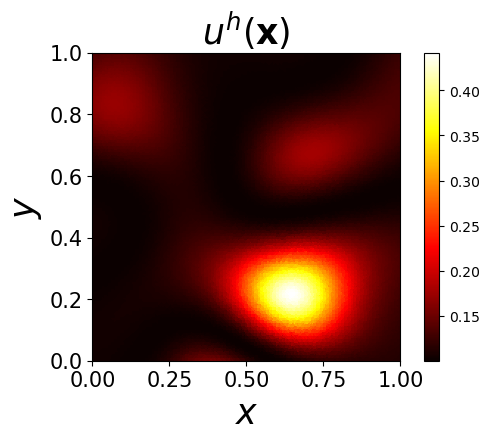

In [13]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], theta.forward(x), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

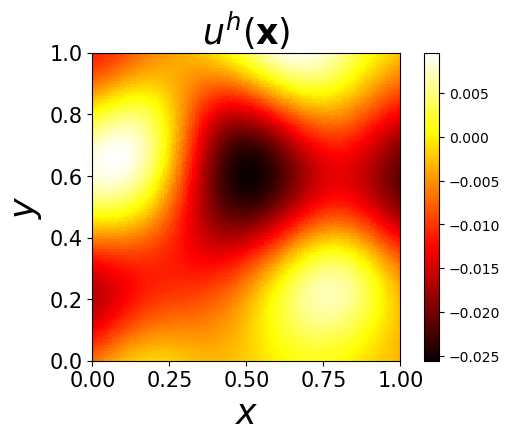

In [14]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], u.forward(x), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

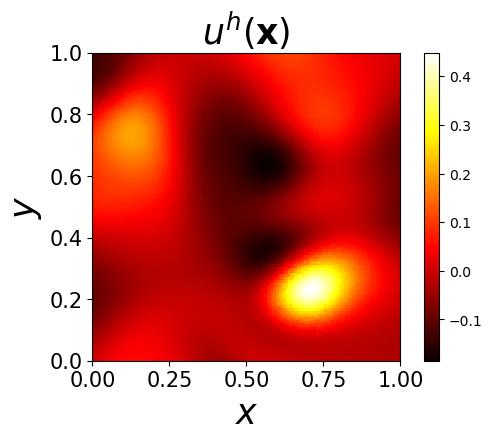

In [15]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], f.forward(x), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

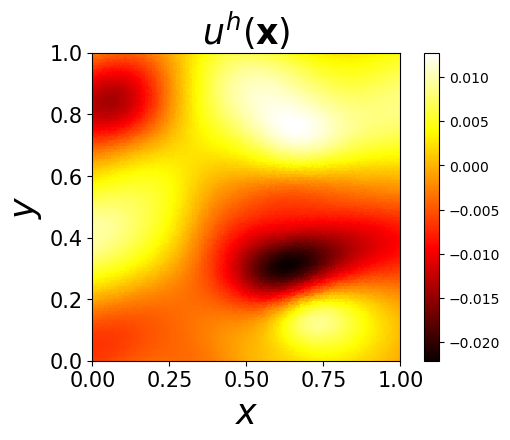

In [16]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], etat.forward(x), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

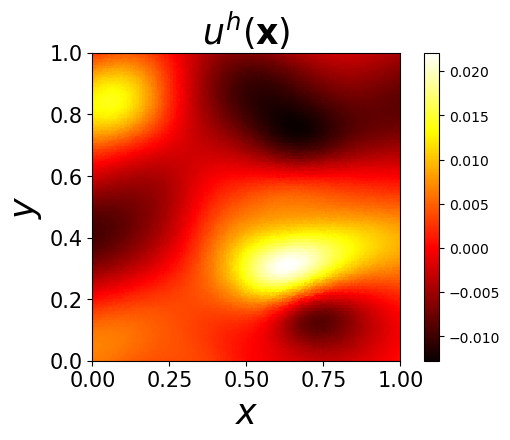

In [17]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], etab.forward(x), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

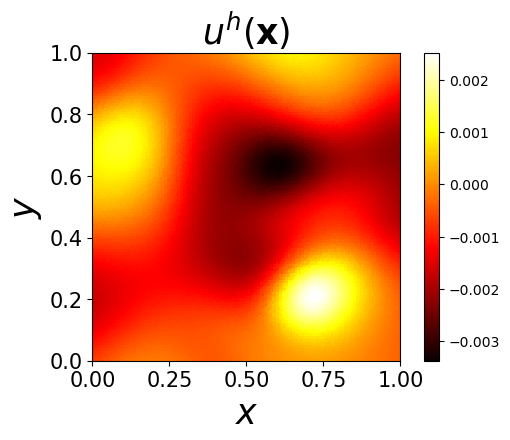

In [18]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], g.forward(x), cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

In [19]:
from ManufacturedSolutionsDarcy import *

In [21]:
l = 0.05
dataset = MFSetDarcy(N_samples=1, d=2, l_theta_min=l, l_theta_max=l, l_u_min=l/2, l_u_max=l/2)

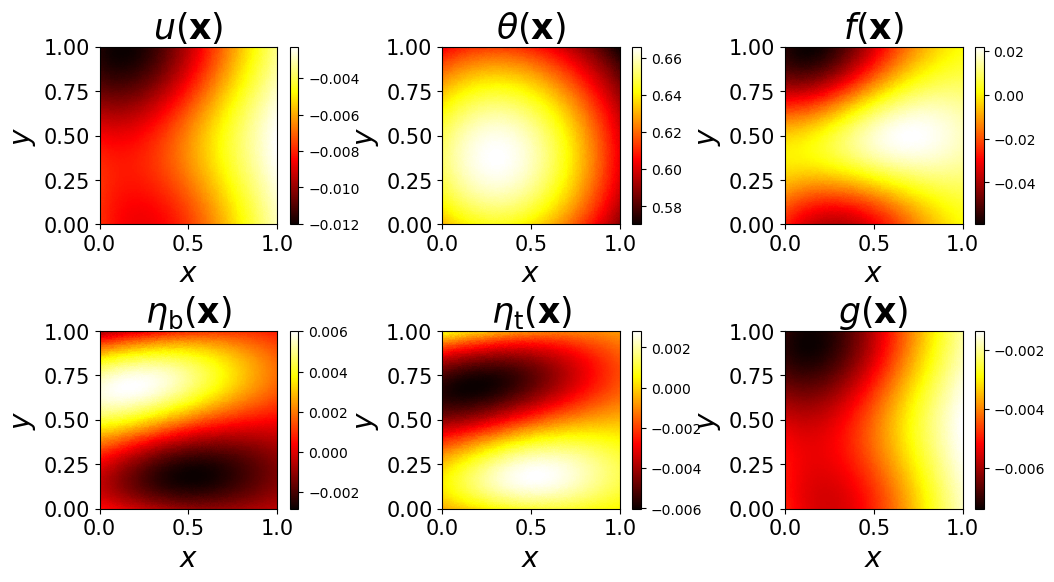

In [36]:
s = 0

size_title = 25
size_ticklabels = 15
size_axeslabels = 20
box_lw = 7

fig, axs = plt.subplots(2,3, figsize=(12, 6))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.6)

ax = axs[0,0]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.u[s](x), cmap='hot')
ax.set_title(r"$u(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

ax = axs[0,1]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.theta[s](x), cmap='hot')
ax.set_title(r"$\theta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

ax = axs[0,2]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.f[s](x), cmap='hot')
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

ax = axs[1,0]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.etab[s](x), cmap='hot')
ax.set_title(r"$\eta_{\mathrm{b}}(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

ax = axs[1,1]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.etat[s](x), cmap='hot')
ax.set_title(r"$\eta_{\mathrm{t}}(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

ax = axs[1,2]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.gl[s](x), cmap='hot')
ax.set_title(r"$g(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

In [53]:
s = 3

size_title = 25
size_ticklabels = 15
size_axeslabels = 20
box_lw = 7

fig, axs = plt.subplots(1,3, figsize=(14, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.6)

ax = axs[0]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.u[s](x), cmap='hot')
ax.set_title(r"$u(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

ax = axs[1]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.theta[s](x), cmap='hot')
ax.set_title(r"$\theta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

ax = axs[2]
fig = ax.tripcolor(x[:,0], x[:,1], dataset.f[s](x), cmap='hot')
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

fig, axs = plt.subplots(1,2, figsize=(8, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.6)

ax = axs[0]
fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=dataset.etab[s](x[x[:,1]==0]), s=100, cmap='hot')
fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=dataset.etat[s](x[x[:,1]==1]), s=100, cmap='hot')
ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

ax = axs[1]
fig = ax.scatter(x[x[:,0]==0,0], x[x[:,0]==0,1], c=dataset.gl[s](x[x[:,0]==0]), s=100, cmap='hot')
fig = ax.scatter(x[x[:,0]==1,0], x[x[:,0]==1,1], c=dataset.gr[s](x[x[:,0]==1]), s=100, cmap='hot')
ax.set_title(r"$g(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)
# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

KeyboardInterrupt: 

<Figure size 1400x400 with 0 Axes>

In [ ]:
# s = 3

# size_title = 25
# size_ticklabels = 15
# size_axeslabels = 25

# fig, ax = plt.subplots(1,1, figsize=(6, 4))
# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
# fig = ax.tripcolor(x[:,0], x[:,1], dataset.u[s](x), cmap='hot')
# ax.set_title(r"$u(\mathbf{x})$", fontsize=size_title)
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# ax.set_aspect('equal')
# plt.colorbar(fig)
# plt.savefig("u.svg", bbox_inches='tight')

# fig, ax = plt.subplots(1,1, figsize=(6, 4))
# fig = ax.tripcolor(x[:,0], x[:,1], dataset.theta[s](x), cmap='hot')
# ax.set_title(r"$\theta(\mathbf{x})$", fontsize=size_title)
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# ax.set_aspect('equal')
# plt.colorbar(fig)
# plt.savefig("theta.svg", bbox_inches='tight')

# fig, ax = plt.subplots(1,1, figsize=(6, 4))
# fig = ax.tripcolor(x[:,0], x[:,1], dataset.f[s](x), cmap='hot')
# ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# ax.set_aspect('equal')
# plt.colorbar(fig)
# plt.savefig("f.svg", bbox_inches='tight')

# fig, ax = plt.subplots(1,1, figsize=(6, 4))
# fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=dataset.etab[s](x[x[:,1]==0]), s=1000, cmap='hot')
# fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=dataset.etat[s](x[x[:,1]==1]), s=1000, cmap='hot')
# ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# ax.set_aspect('equal')
# plt.colorbar(fig)
# plt.savefig("eta.svg", bbox_inches='tight')

# fig, ax = plt.subplots(1,1, figsize=(6, 4))
# fig = ax.scatter(x[x[:,0]==0,0], x[x[:,0]==0,1], c=dataset.gl[s](x[x[:,0]==0]), s=1000, cmap='hot')
# fig = ax.scatter(x[x[:,0]==1,0], x[x[:,0]==1,1], c=dataset.gr[s](x[x[:,0]==1]), s=1000, cmap='hot')
# ax.set_title(r"$g(\mathbf{x})$", fontsize=size_title)
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# ax.set_aspect('equal')
# plt.colorbar(fig)
# plt.savefig("g.svg", bbox_inches='tight')